In [1]:
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=LINK&tsym=USD&limit=450')
hist = pd.DataFrame(json.loads(res.content)['Data'])

In [3]:
hist.head()

,time,close,high,low,open,volumefrom,volumeto
0,1565568000,2.390,2.470,2.336,2.409,1307499.89,3146791.73
1,1565654400,2.414,2.450,2.307,2.390,1555377.18,3709837.23
2,1565740800,2.286,2.584,2.160,2.414,3939233.20,9478045.71
3,1565827200,2.423,2.443,2.167,2.286,2430245.88,5610670.72
4,1565913600,2.306,2.450,2.230,2.423,1883366.54,4385340.96


In [4]:
hist['time'] = pd.to_datetime(hist['time'], unit='s')

In [5]:
data = hist.drop("high", axis=1)

In [6]:
data = data.drop(["low", "open", "volumefrom", "volumeto"], axis=1)

In [7]:
#time series 
import fbprophet

Importing plotly failed. Interactive plots will not work.


In [8]:
#model initialze 

from fbprophet import Prophet
m= Prophet()

In [9]:
m.add_seasonality(name="daily",period=30.5,fourier_order=5)

In [10]:
data.shape

(451, 2)

In [11]:
def train_test_split(df, test_size=0.2):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data

In [12]:
train, test = train_test_split(data, test_size=0.2)

In [13]:
data.rename(columns={"time":"ds","close":"y"},inplace=True)

In [14]:
#fit model
m.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


In [15]:
#future date 

future_dates = m.make_future_dataframe(periods=15)

In [16]:
#predictions

prediction = m.predict(future_dates)

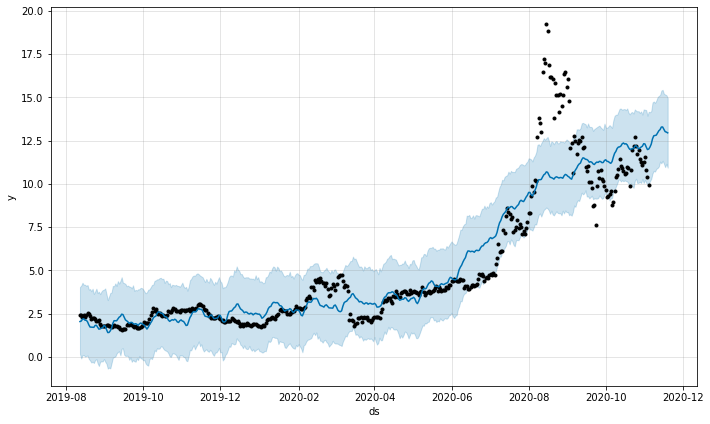

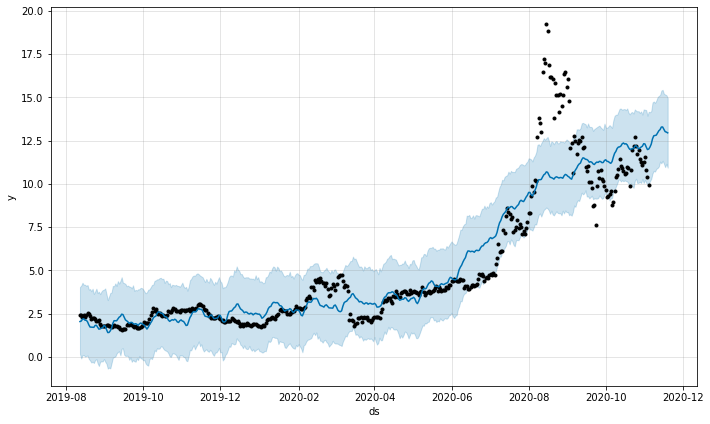

In [17]:
m.plot(prediction)

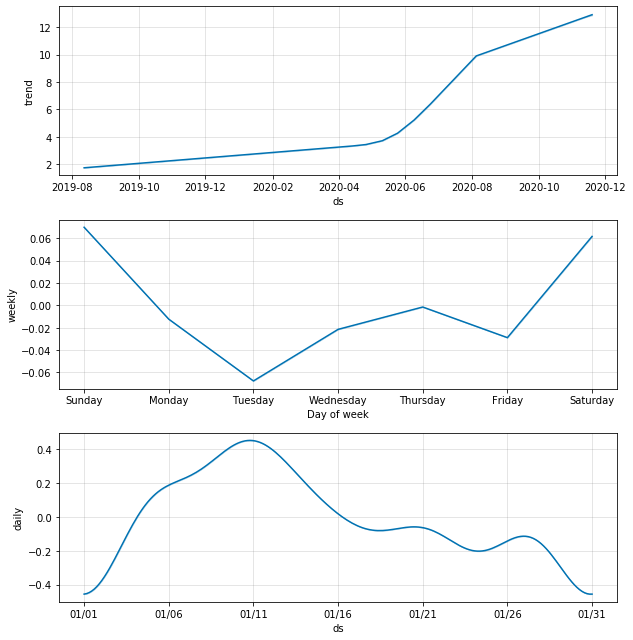

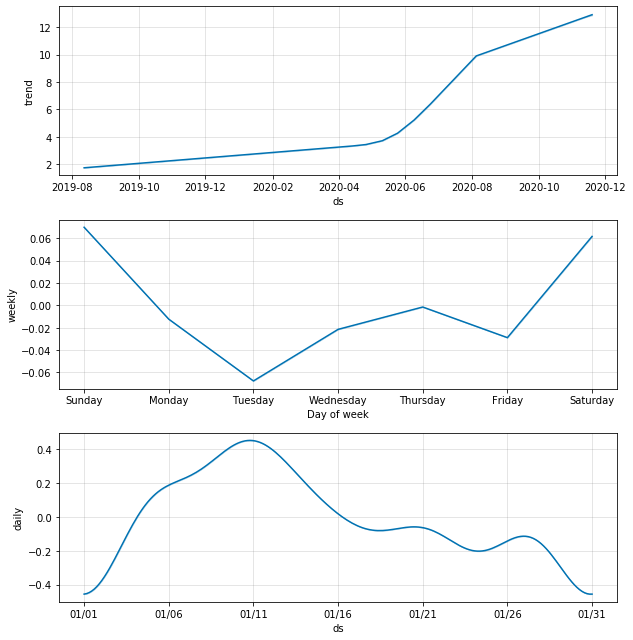

In [18]:
m.plot_components(prediction)

In [19]:
test

,time,close
361,2020-08-07,10.140
362,2020-08-08,12.730
363,2020-08-09,13.830
364,2020-08-10,13.490
365,2020-08-11,12.980
...,...,...
446,2020-10-31,11.250
447,2020-11-01,11.570
448,2020-11-02,10.790
449,2020-11-03,10.390


In [20]:
test=test.set_index("time")

In [21]:
test=test["close"]

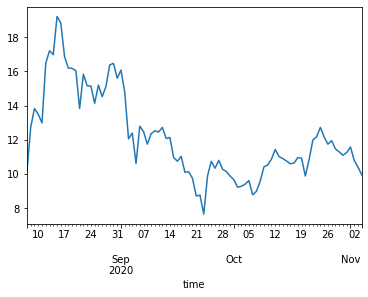

In [22]:
test.plot()

In [23]:
# find point/date for change

from fbprophet.plot import add_changepoints_to_plot

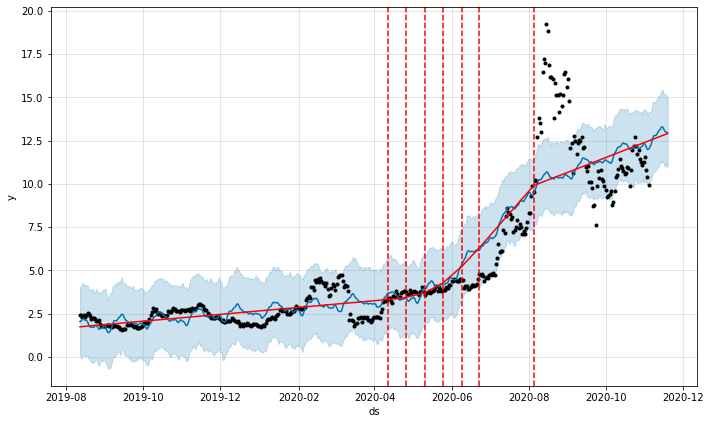

In [24]:
fig =m.plot(prediction)
c= add_changepoints_to_plot(fig.gca(),m,prediction)